In [1]:
import os
from glob import glob

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/*/*.png')

In [5]:
data_paths[0]

'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png'

In [8]:
path = data_paths[0]
path

'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training\\0\\1.png'

In [9]:
data_paths = tf.io.matching_files('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/*/*.png')

In [11]:
path = data_paths[0]

In [12]:
path

<tf.Tensor: shape=(), dtype=string, numpy=b'C:\\Users\\\xec\x8b\xa0\xec\x83\x81\xed\x9b\x88\\Desktop\\\xec\x83\x88 \xed\x8f\xb4\xeb\x8d\x94\\dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [14]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [16]:
image.shape

TensorShape([28, 28, 1])

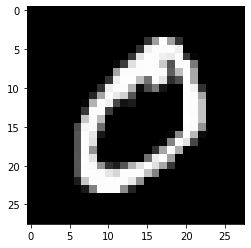

In [17]:
plt.imshow(image[:,:,0],'gray')
plt.show()

## Set Data Generator

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True) #변화를 주면서 여러방면에서 학습시키기 위해 사용

In [25]:
inputs = image[tf.newaxis,...]
inputs.shape

TensorShape([1, 28, 28, 1])

0.0 253.60037 39.306538


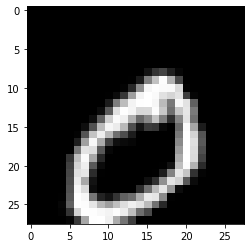

In [26]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range  
- height_shift_range  
  
- brightness_range  
- zoom_range  
  
- horizontal_flip  
- vertical_flip  
  
- rescale  
  
- preprocessing_function 

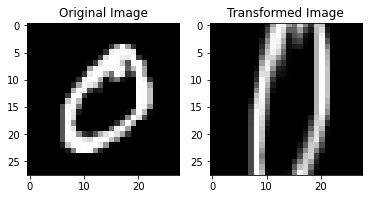

In [27]:
datagen = ImageDataGenerator(
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [28]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
) #테스트 셋은 변화는 필요없지만 train rescale하면 test도 rescale은 해줘야 한다

# TensorFlow 2.0

In [4]:
import os
from glob import glob
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
os.listdir('C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
train_dir = 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/training/'
test_dir = 'C:/Users/신상훈/Desktop/새 폴더/dataset/mnist_png/testing/'

## Hyperparameter Tunning

In [7]:
num_epochs = 10
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (28, 28, 1)
num_classes = 10

In [8]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.3,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        color_mode='grayscale'
)

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        color_mode='grayscale'
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


## Build Model

In [10]:
inputs = layers.Input(input_shape)
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [11]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

## Training

In [13]:
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=1,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

1875/1875 [==============================] - 155s 83ms/step - loss: 0.3094 - accuracy: 0.9020 - val_loss: 0.0826 - val_accuracy: 0.9723
